In [1]:
import numpy
import math
import sys
from numpy import genfromtxt

# Abrindo o CSV
data = genfromtxt('16PF.noUp/data.csv', delimiter=',')

# Usando o resultado do teste 16PF
#data = genfromtxt('16PF.noUp/test_results.csv', delimiter=',')

print(data)

[[             nan              nan              nan ...,              nan
               nan              nan]
 [  1.00000000e+00   4.00000000e+00   2.00000000e+00 ...,              nan
    6.00000000e+00   9.14000000e+02]
 [  4.00000000e+00   3.00000000e+00   4.00000000e+00 ...,              nan
    1.00000000e+00   8.91000000e+02]
 ..., 
 [  2.00000000e+00   4.00000000e+00   2.00000000e+00 ...,              nan
    6.00000000e+00   9.32000000e+02]
 [  4.00000000e+00   4.00000000e+00   4.00000000e+00 ...,              nan
    2.00000000e+00   1.21200000e+03]
 [  4.00000000e+00   5.00000000e+00   4.00000000e+00 ...,              nan
    2.00000000e+00   9.50000000e+02]]


In [2]:
# Pegando apenas as entradas
data = data[1: , 0:163]

(nData, nFeatures) = data.shape

print(data.shape)
print(data)

(49159, 163)
[[ 1.  4.  2. ...,  2.  5.  2.]
 [ 4.  3.  4. ...,  2.  2.  2.]
 [ 3.  4.  4. ...,  3.  3.  3.]
 ..., 
 [ 2.  4.  2. ...,  4.  5.  4.]
 [ 4.  4.  4. ...,  4.  5.  4.]
 [ 4.  5.  4. ...,  4.  4.  5.]]


In [3]:
# Normalizando os dados
data = (data)/4

print(data.shape)
print(data)

(49159, 163)
[[ 0.25  1.    0.5  ...,  0.5   1.25  0.5 ]
 [ 1.    0.75  1.   ...,  0.5   0.5   0.5 ]
 [ 0.75  1.    1.   ...,  0.75  0.75  0.75]
 ..., 
 [ 0.5   1.    0.5  ...,  1.    1.25  1.  ]
 [ 1.    1.    1.   ...,  1.    1.25  1.  ]
 [ 1.    1.25  1.   ...,  1.    1.    1.25]]


In [4]:
# Clusterizando os dados
from sklearn.cluster import KMeans

# Lista dos custos vs cluster para plotar depois
XX = [];
YY = [];

# Lista de cada clusterizacao (pra nao ter que re-rodar o algoritmo de novo)
kmeans = [];

maxClusters = 10

for cc in range(1, maxClusters):

    km = KMeans(
                n_clusters=cc,
                n_jobs=-1
            ).fit(data)

    kmeans.append(km)
    
    # Calcula o Custo

    core = km.cluster_centers_
    label = km.labels_

    J = 0
    for i in range(0, nData):
        diferenca = data[i] - core[label[i]]
        erro = math.sqrt(numpy.dot(diferenca, diferenca))
        J = J + erro

    YY.append(J)
    XX.append(cc)
    sys.stdout.write(str(cc) + ' ')
    
print('-----> Done')

1 2 3 4 5 6 7 8 9 -----> Done


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[174779.60942986017, 167657.0459053498, 164234.1070433468, 161711.36771773704, 159898.40224119351, 158485.53627389556, 157485.65062801234, 156611.1954170081, 155921.66775656253]


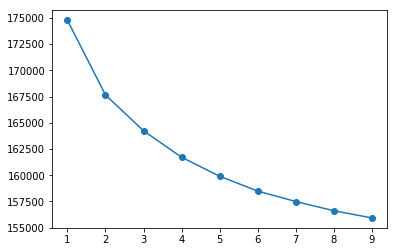

In [5]:
# Plotando os resultados
import matplotlib.pyplot as plt

print(XX)
print(YY)

plt.plot(XX, YY, '-o')
plt.show()

1 2 3 4 5 6 7 8 [0.080054345292270998, 0.080780116122666973, 0.055108325109135568, 0.045365921104566533, 0.050708077441185384, 0.035943898246352218, 0.033963819021444373, 0.031374261192521756]


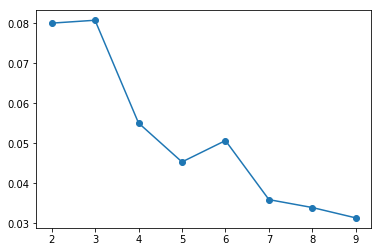

In [6]:
# Plotando a Silhueta
from sklearn import metrics

silhouette = []

for cc in range(1, maxClusters-1):
    km = kmeans[cc]
    label = km.labels_
    
    sys.stdout.write(str(cc) + ' ')
        
    sh = metrics.silhouette_score(data, label, sample_size=600)
    silhouette.append(sh)    
    
print(silhouette)

plt.plot(XX[1:], silhouette, '-o')
plt.show()

In [7]:
# Ve qual o melhor valor da silhueta
best = silhouette.index(max(silhouette)) + 2
print('Melhor resultado: ', best, 'clusteres with ', silhouette[best-2])

Melhor resultado:  3 clusteres with  0.0807801161227


In [9]:
# Separa os grupos da melhor silhueta
import os

# Abre o dataset como strings
with open('16PF.noUp/data.csv') as f:
    lines = f.readlines()
    
    # Cria uma pasta
    if not os.path.exists('dataset/cl'+str(best)):
        os.mkdir('dataset/cl'+str(best))
    
    # Abre os arquivos de cada cluster, e escreve o header do CSV
    out = []
    for i in range(0, best):
        oo = open('dataset/cl'+str(best)+'/cluster'+str(i)+'.csv', 'w')
        oo.write(lines[0])
        out.append(oo)
    
    # Para cada dado, escreve no arquivo certo do cluster
    label = kmeans[best-1].labels_
    for i in range(1, len(lines)):
        out[label[i-1]].write(lines[i])
    
    # Fecha os arquivos de cada cluster
    for i in range(0, best):
        oo = out[i]
        oo.close()
    